# Let's import a bunch of stuff

In [1]:
import sys
import seaborn as sb
import scanpy.api as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import argparse
import gc
import anndata
import random
import scipy.stats as stats
from decimal import Decimal
import combat
import patsy

%matplotlib inline

In [2]:
%matplotlib inline

##################
# Configure file #
##################
sc.settings.verbosity = 2
sc.settings.autoshow = False

##logging.basicConfig(filename="CLUESImmVar_processed.V4.1.log", level=logging.ERROR)
sc.settings.set_figure_params(dpi=100, dpi_save=600, format='png')

plt.rcParams["image.aspect"] = "equal"
##%matplotlib inline

In [3]:
version = "V6"

figdir = "./figures."+version+"/"
sc.settings.figdir = figdir

In [4]:
adata = sc.read("CLUESImmvarMonoDC."+version+".h5ad", cache=False)
adata.shape

(238293, 1829)

In [5]:
adata.obs['disease_pop_cov'] = pd.Categorical(adata.obs.apply(lambda row: row['disease_cov'] + row['pop_cov'], axis=1),
                                             categories=['healthyWHITE','sleWHITE','sleASIAN'],
                                             ordered=True)

In [6]:
adata.obs['site'] = pd.Categorical(adata.obs.disease_cov, categories=['Broad','UCSF'])
adata.obs.site[adata.obs.batch_cov.str.contains("immvar")] = "Broad"
adata.obs.site[~adata.obs.batch_cov.str.contains("immvar")] = "UCSF"

adata.obs['disease_pop_site_cov'] = pd.Categorical(adata.obs.apply(lambda row: row['disease_cov'] + row['pop_cov'] + row['site'], axis=1),
                                             categories=['healthyWHITEBroad','healthyWHITEUCSF','sleWHITEUCSF','sleASIANUCSF'],
                                             ordered=True)

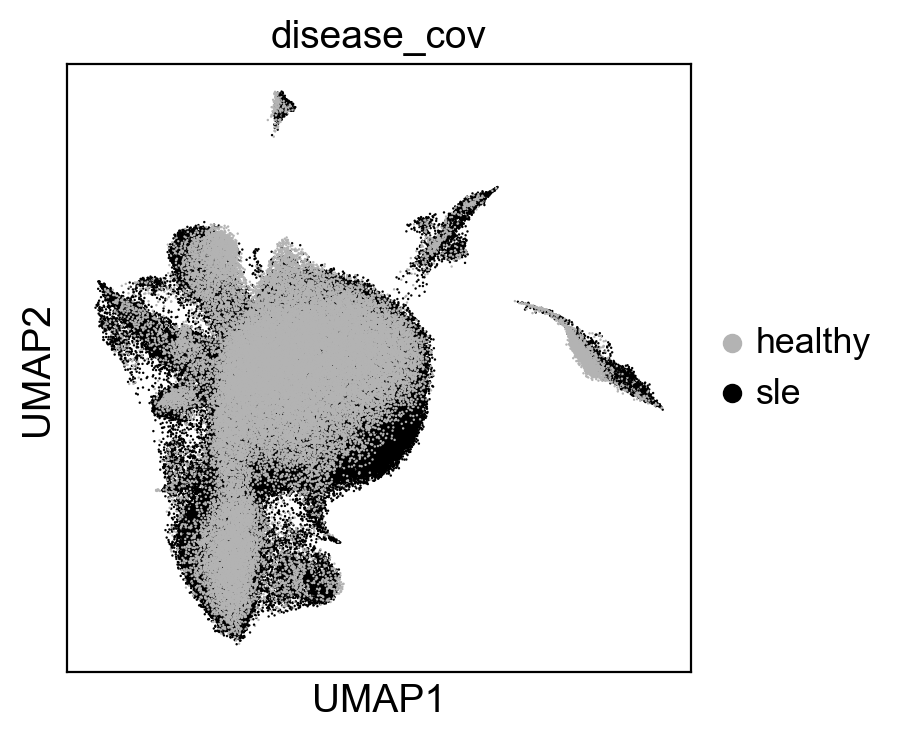

In [7]:
sc.pl.umap(adata, color='disease_cov', size=3, edgecolor="none", palette=['#B3B3B3','#000000'])

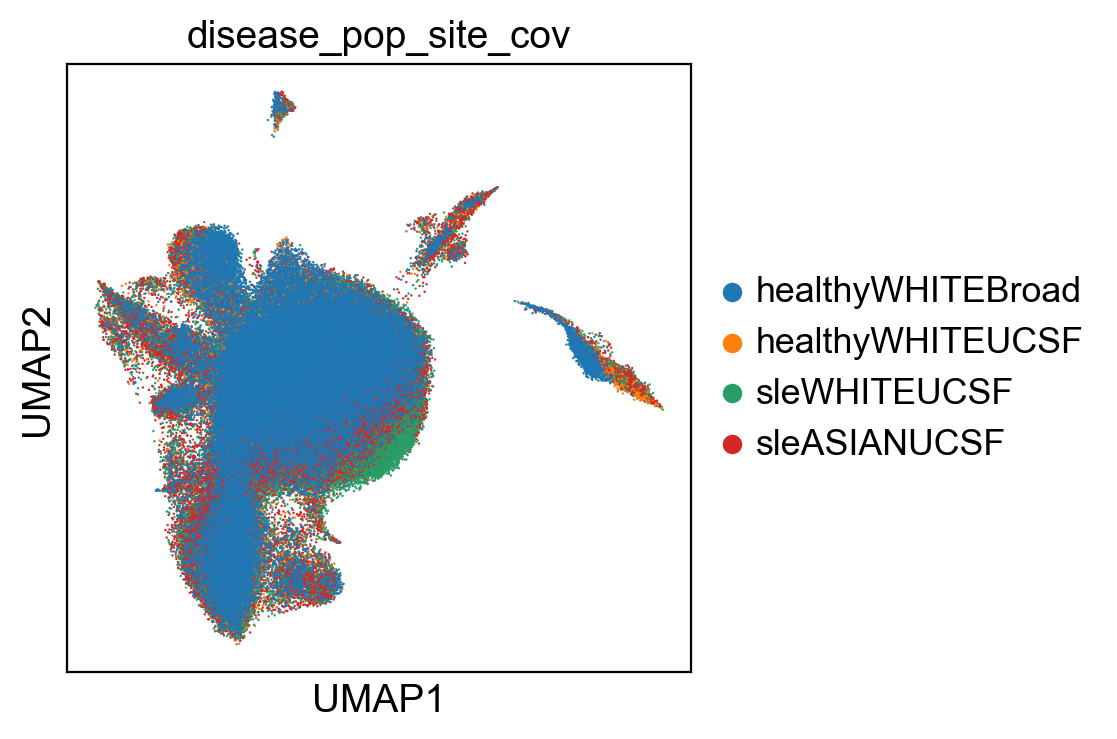

In [8]:
adata.uns['disease_pop_site_cov_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.pl.umap(adata, color='disease_pop_site_cov', size=3, edgecolor="none")

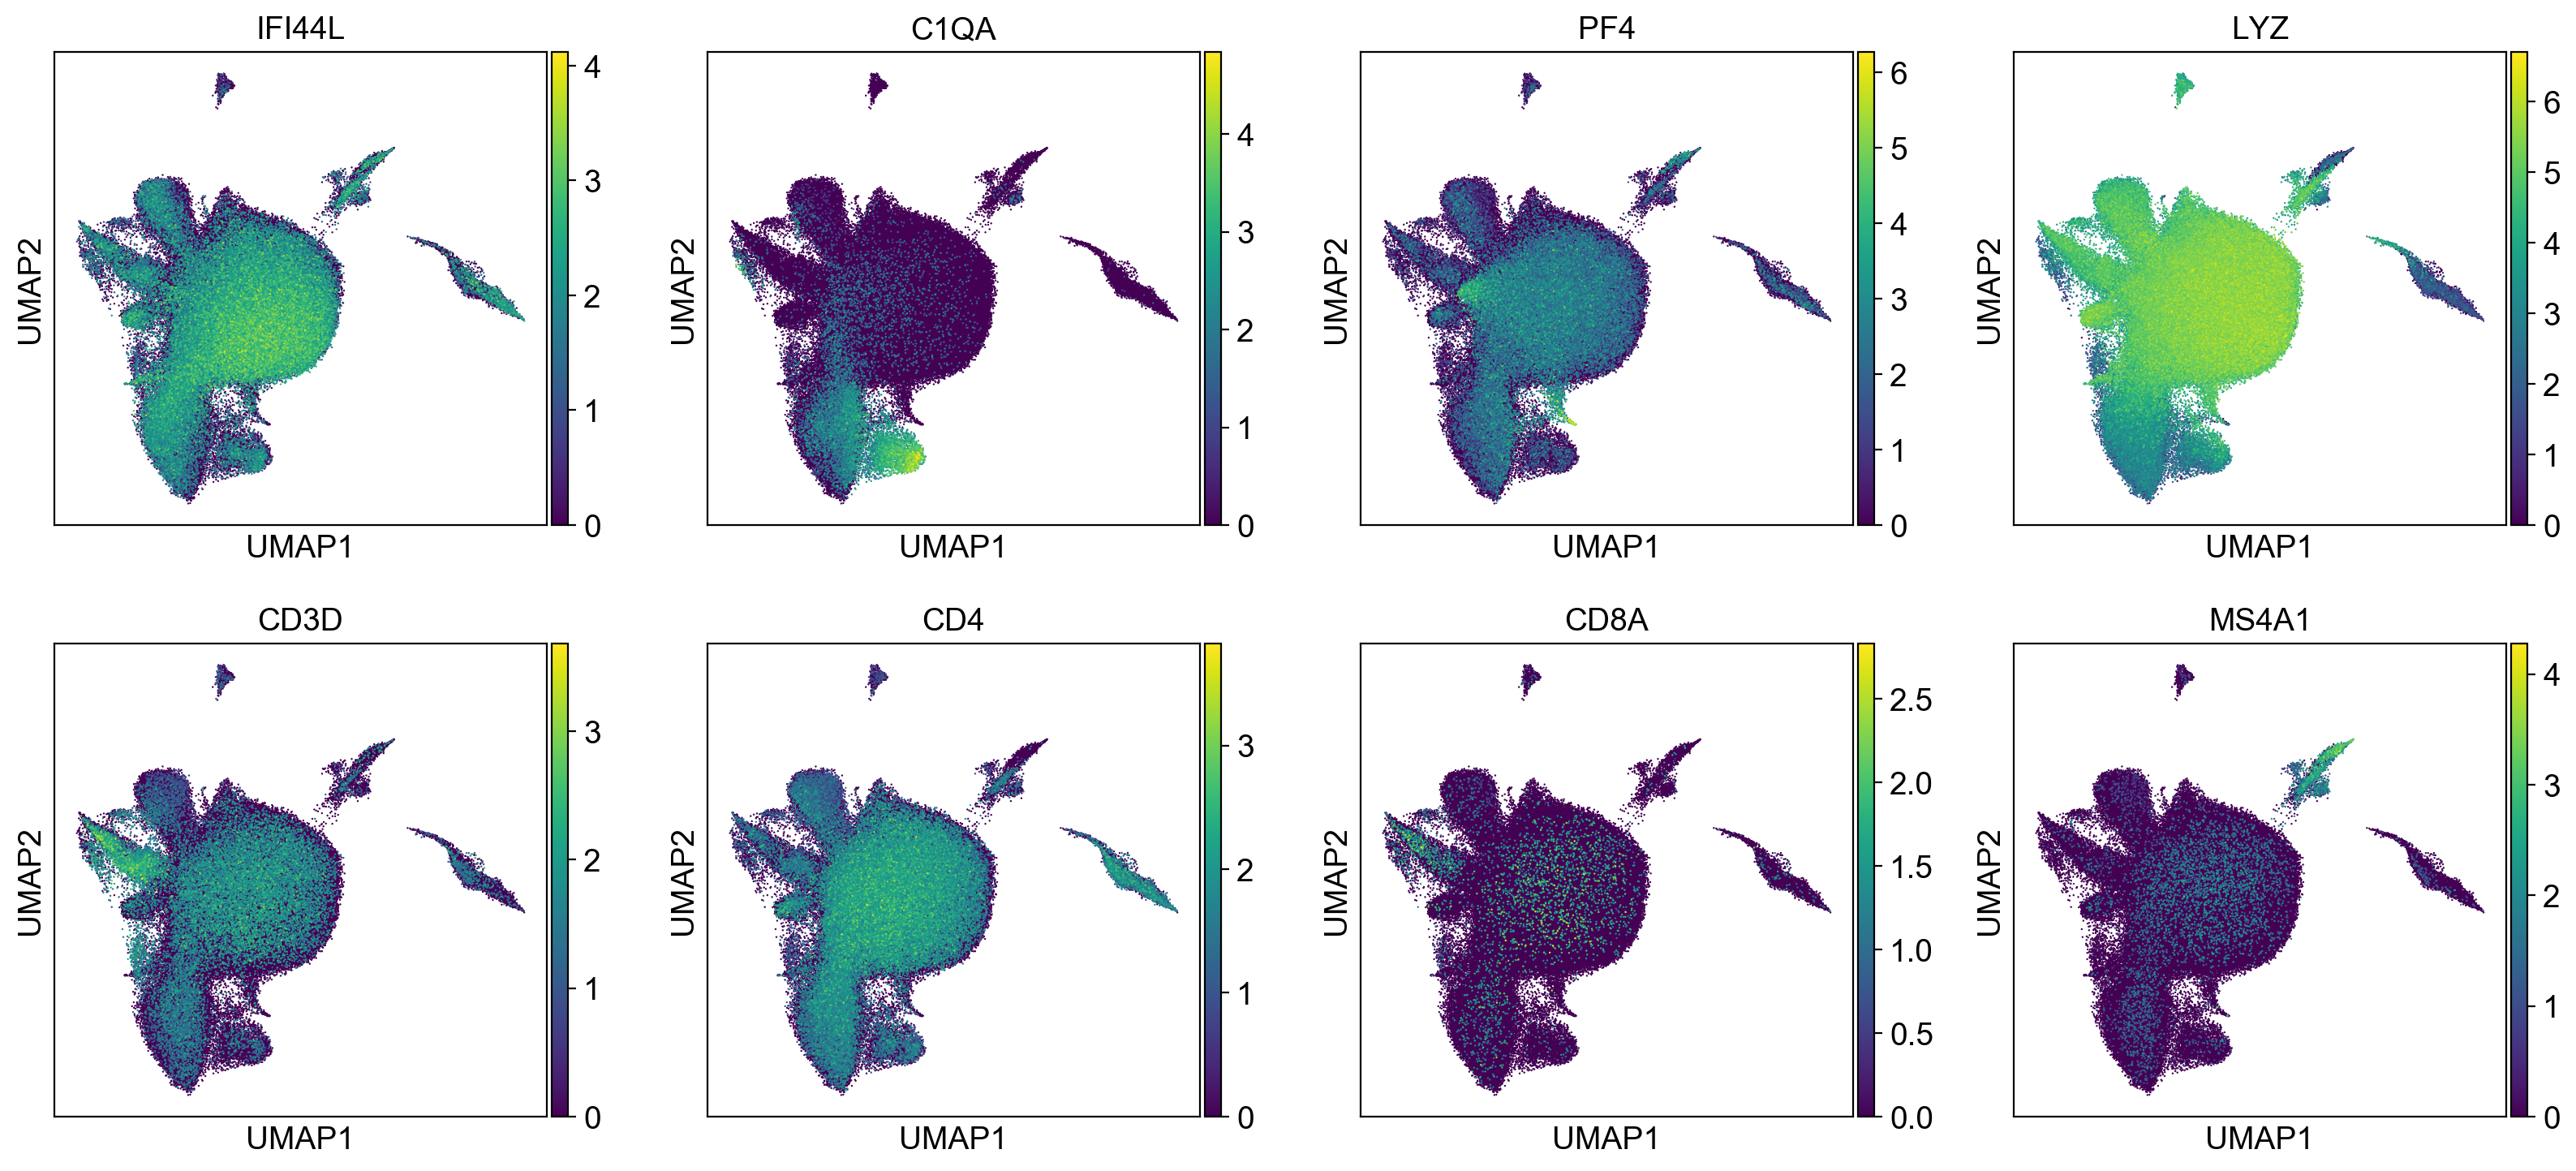

In [9]:
sc.pl.umap(adata, color=['IFI44L','C1QA','PF4','LYZ','CD3D','CD4', 'CD8A','MS4A1'], size=3)

ranking genes
    finished (0:02:20.45)


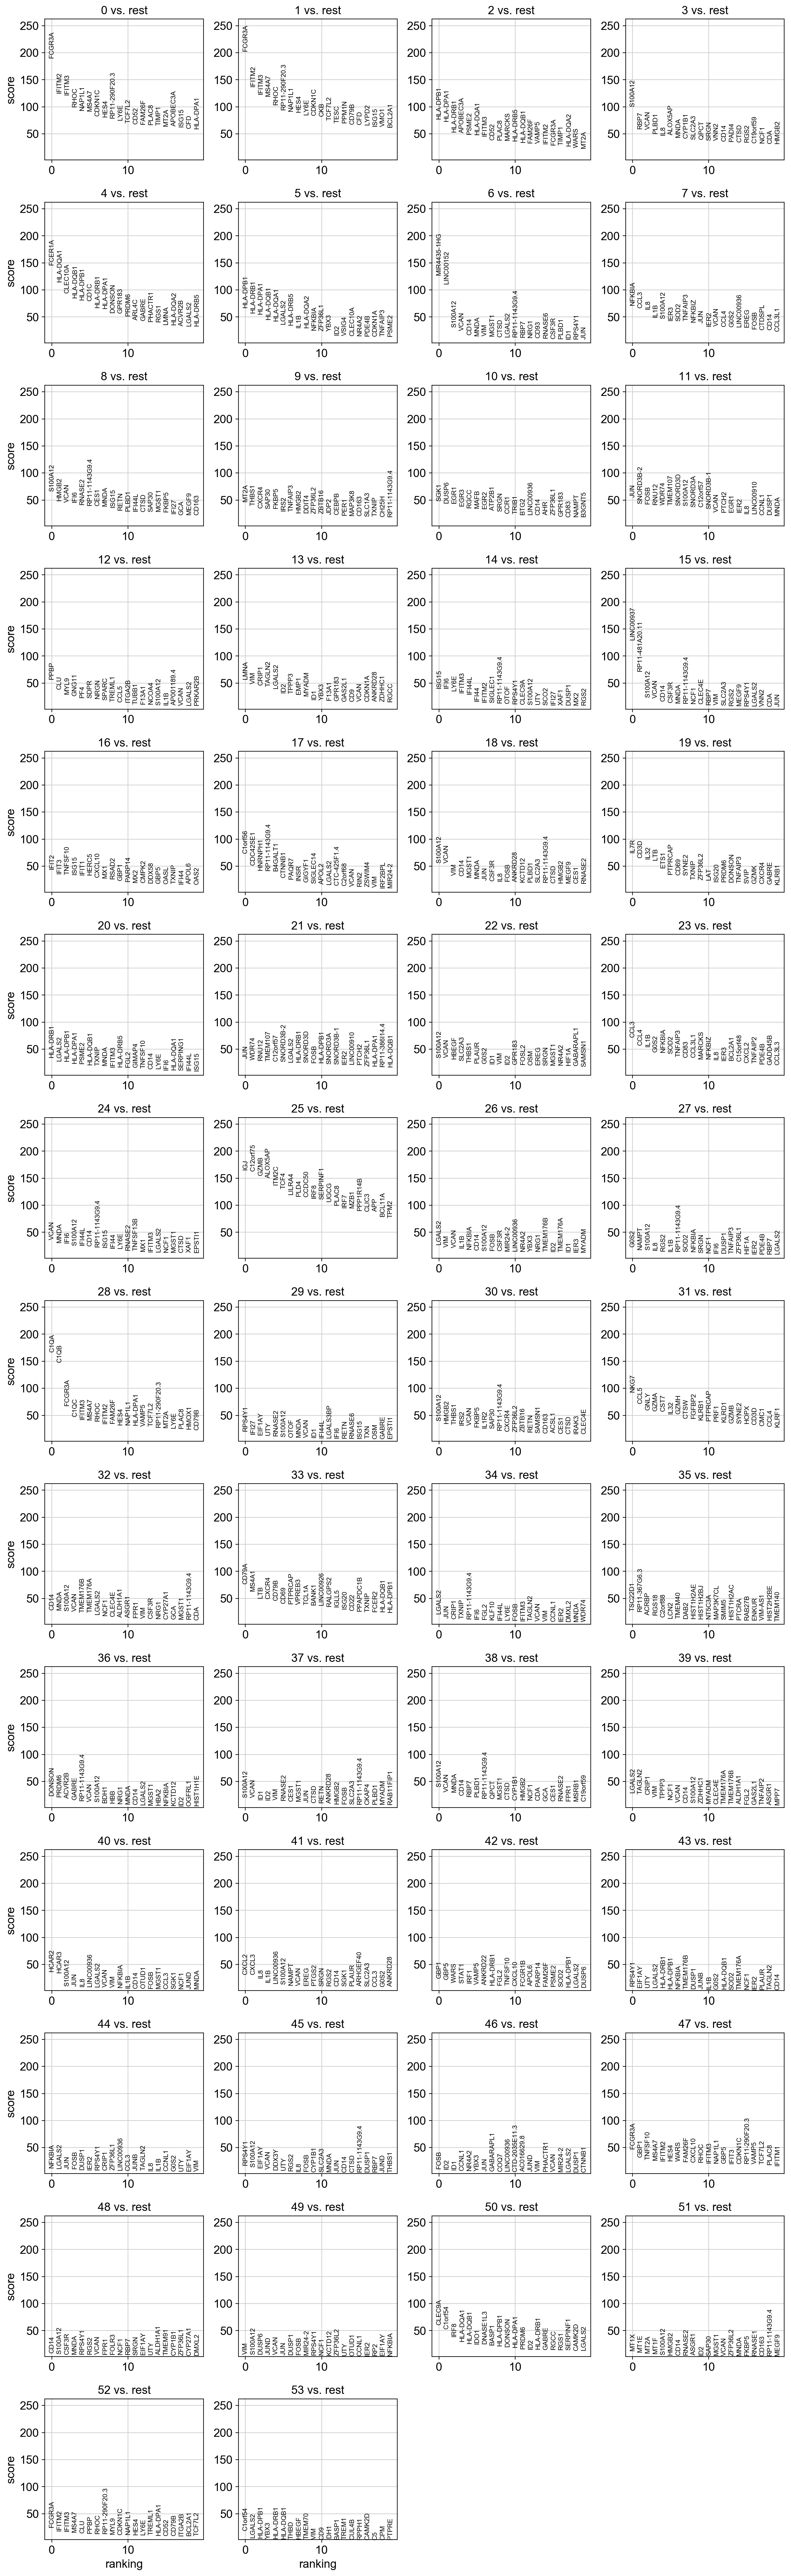

In [32]:
sc.tl.rank_genes_groups(adata, n_genes=20, groupby='leiden', use_raw=False)
sc.pl.rank_genes_groups(adata)

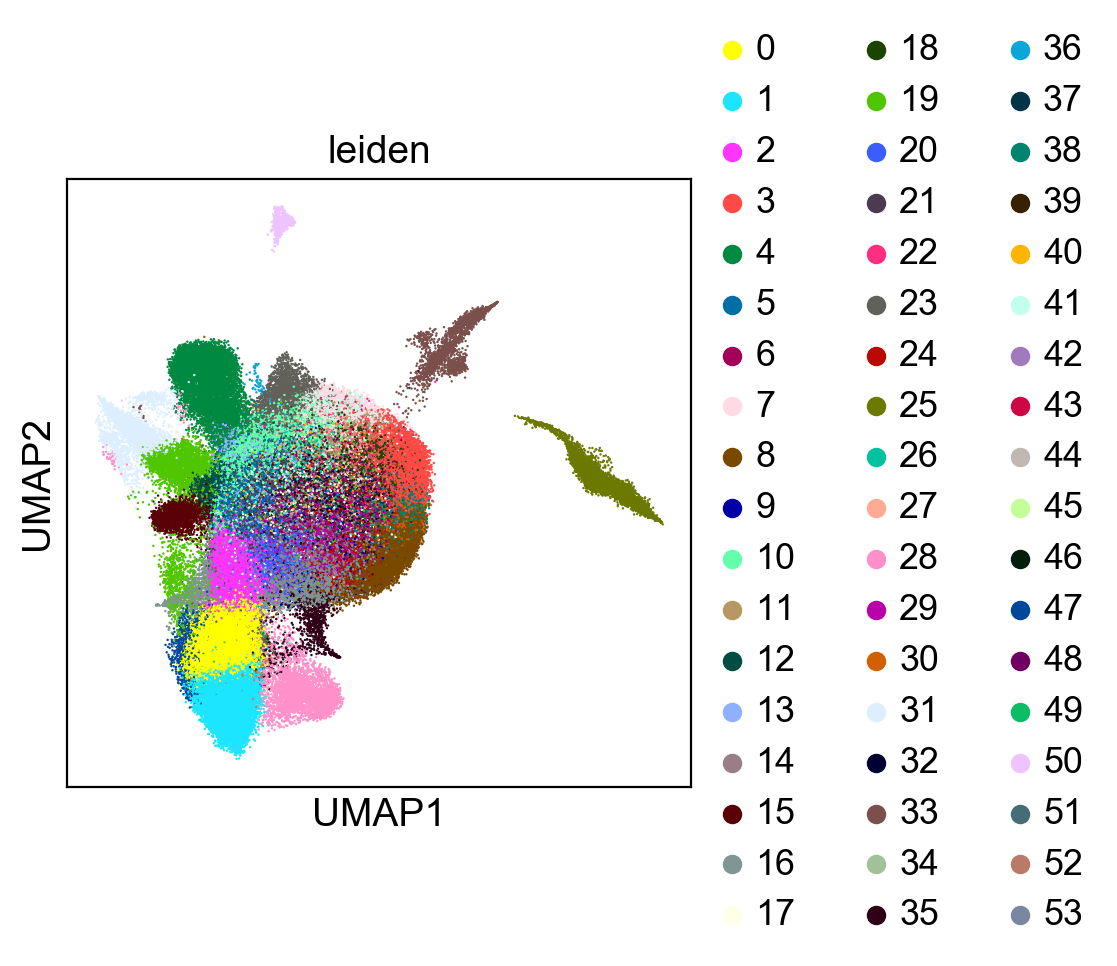

In [10]:
adata.uns['leiden_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.pl.umap(adata, color='leiden', size=3)

## remove bad clusters and recluster

In [11]:
adata = adata[~adata.obs.leiden.isin(["12","19","31","33"])] ## T cell doublets, B cell doublets and platelet contam

In [12]:
sc.pp.pca(adata, random_state=1, svd_solver='arpack')
sc.pp.neighbors(adata, random_state=1)
sc.tl.umap(adata, random_state=1)
sc.tl.leiden(adata, random_state=1)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:01:39.48)
computing UMAP
    finished (0:02:57.89)
running Leiden clustering
    finished (0:09:05.62)


In [13]:
sc.tl.louvain(adata, random_state=1)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:01:12.72)


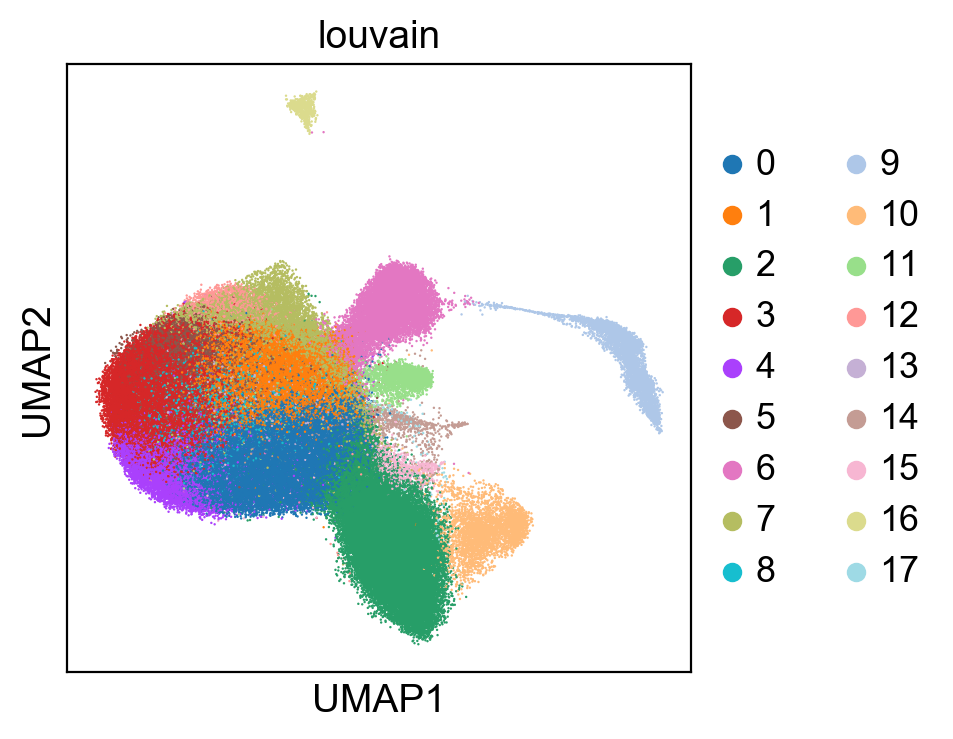

In [14]:
adata.uns['louvain_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.pl.umap(adata, color='louvain', size=3)

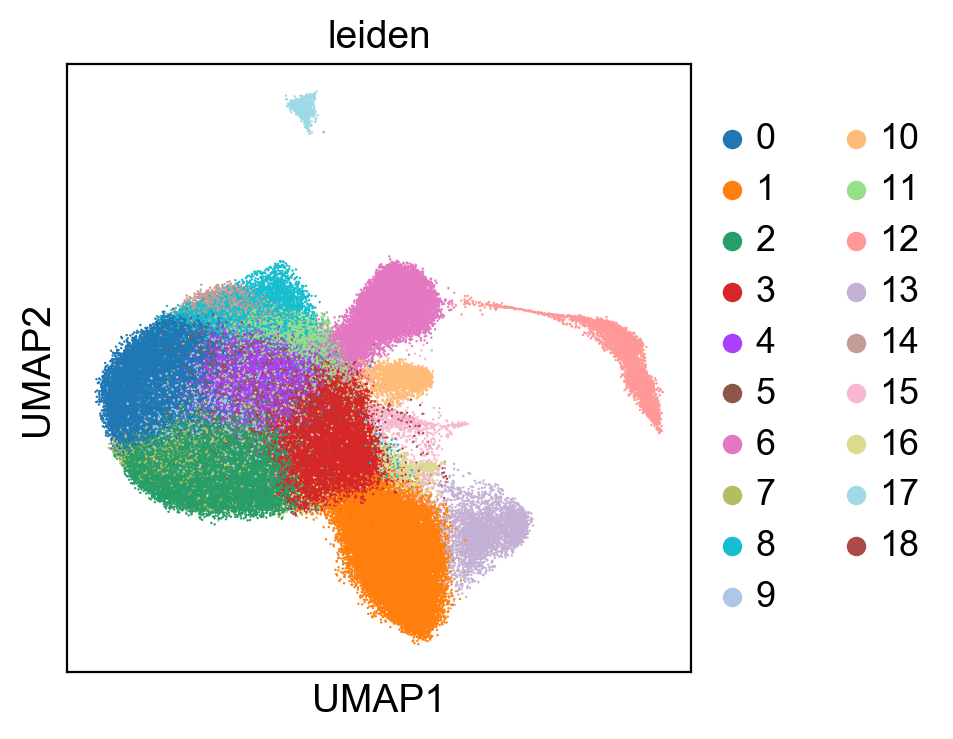

In [15]:
adata.uns['leiden_colors'] = sc.pl.palettes.vega_20_scanpy;
sc.pl.umap(adata, color='leiden', size=3)

In [39]:
adata.write("/Users/yimmieg/Downloads/CLUESImmVarMonoDC.V6.combat.refined.h5ad", compression="gzip")

ranking genes
    finished (0:00:55.82)


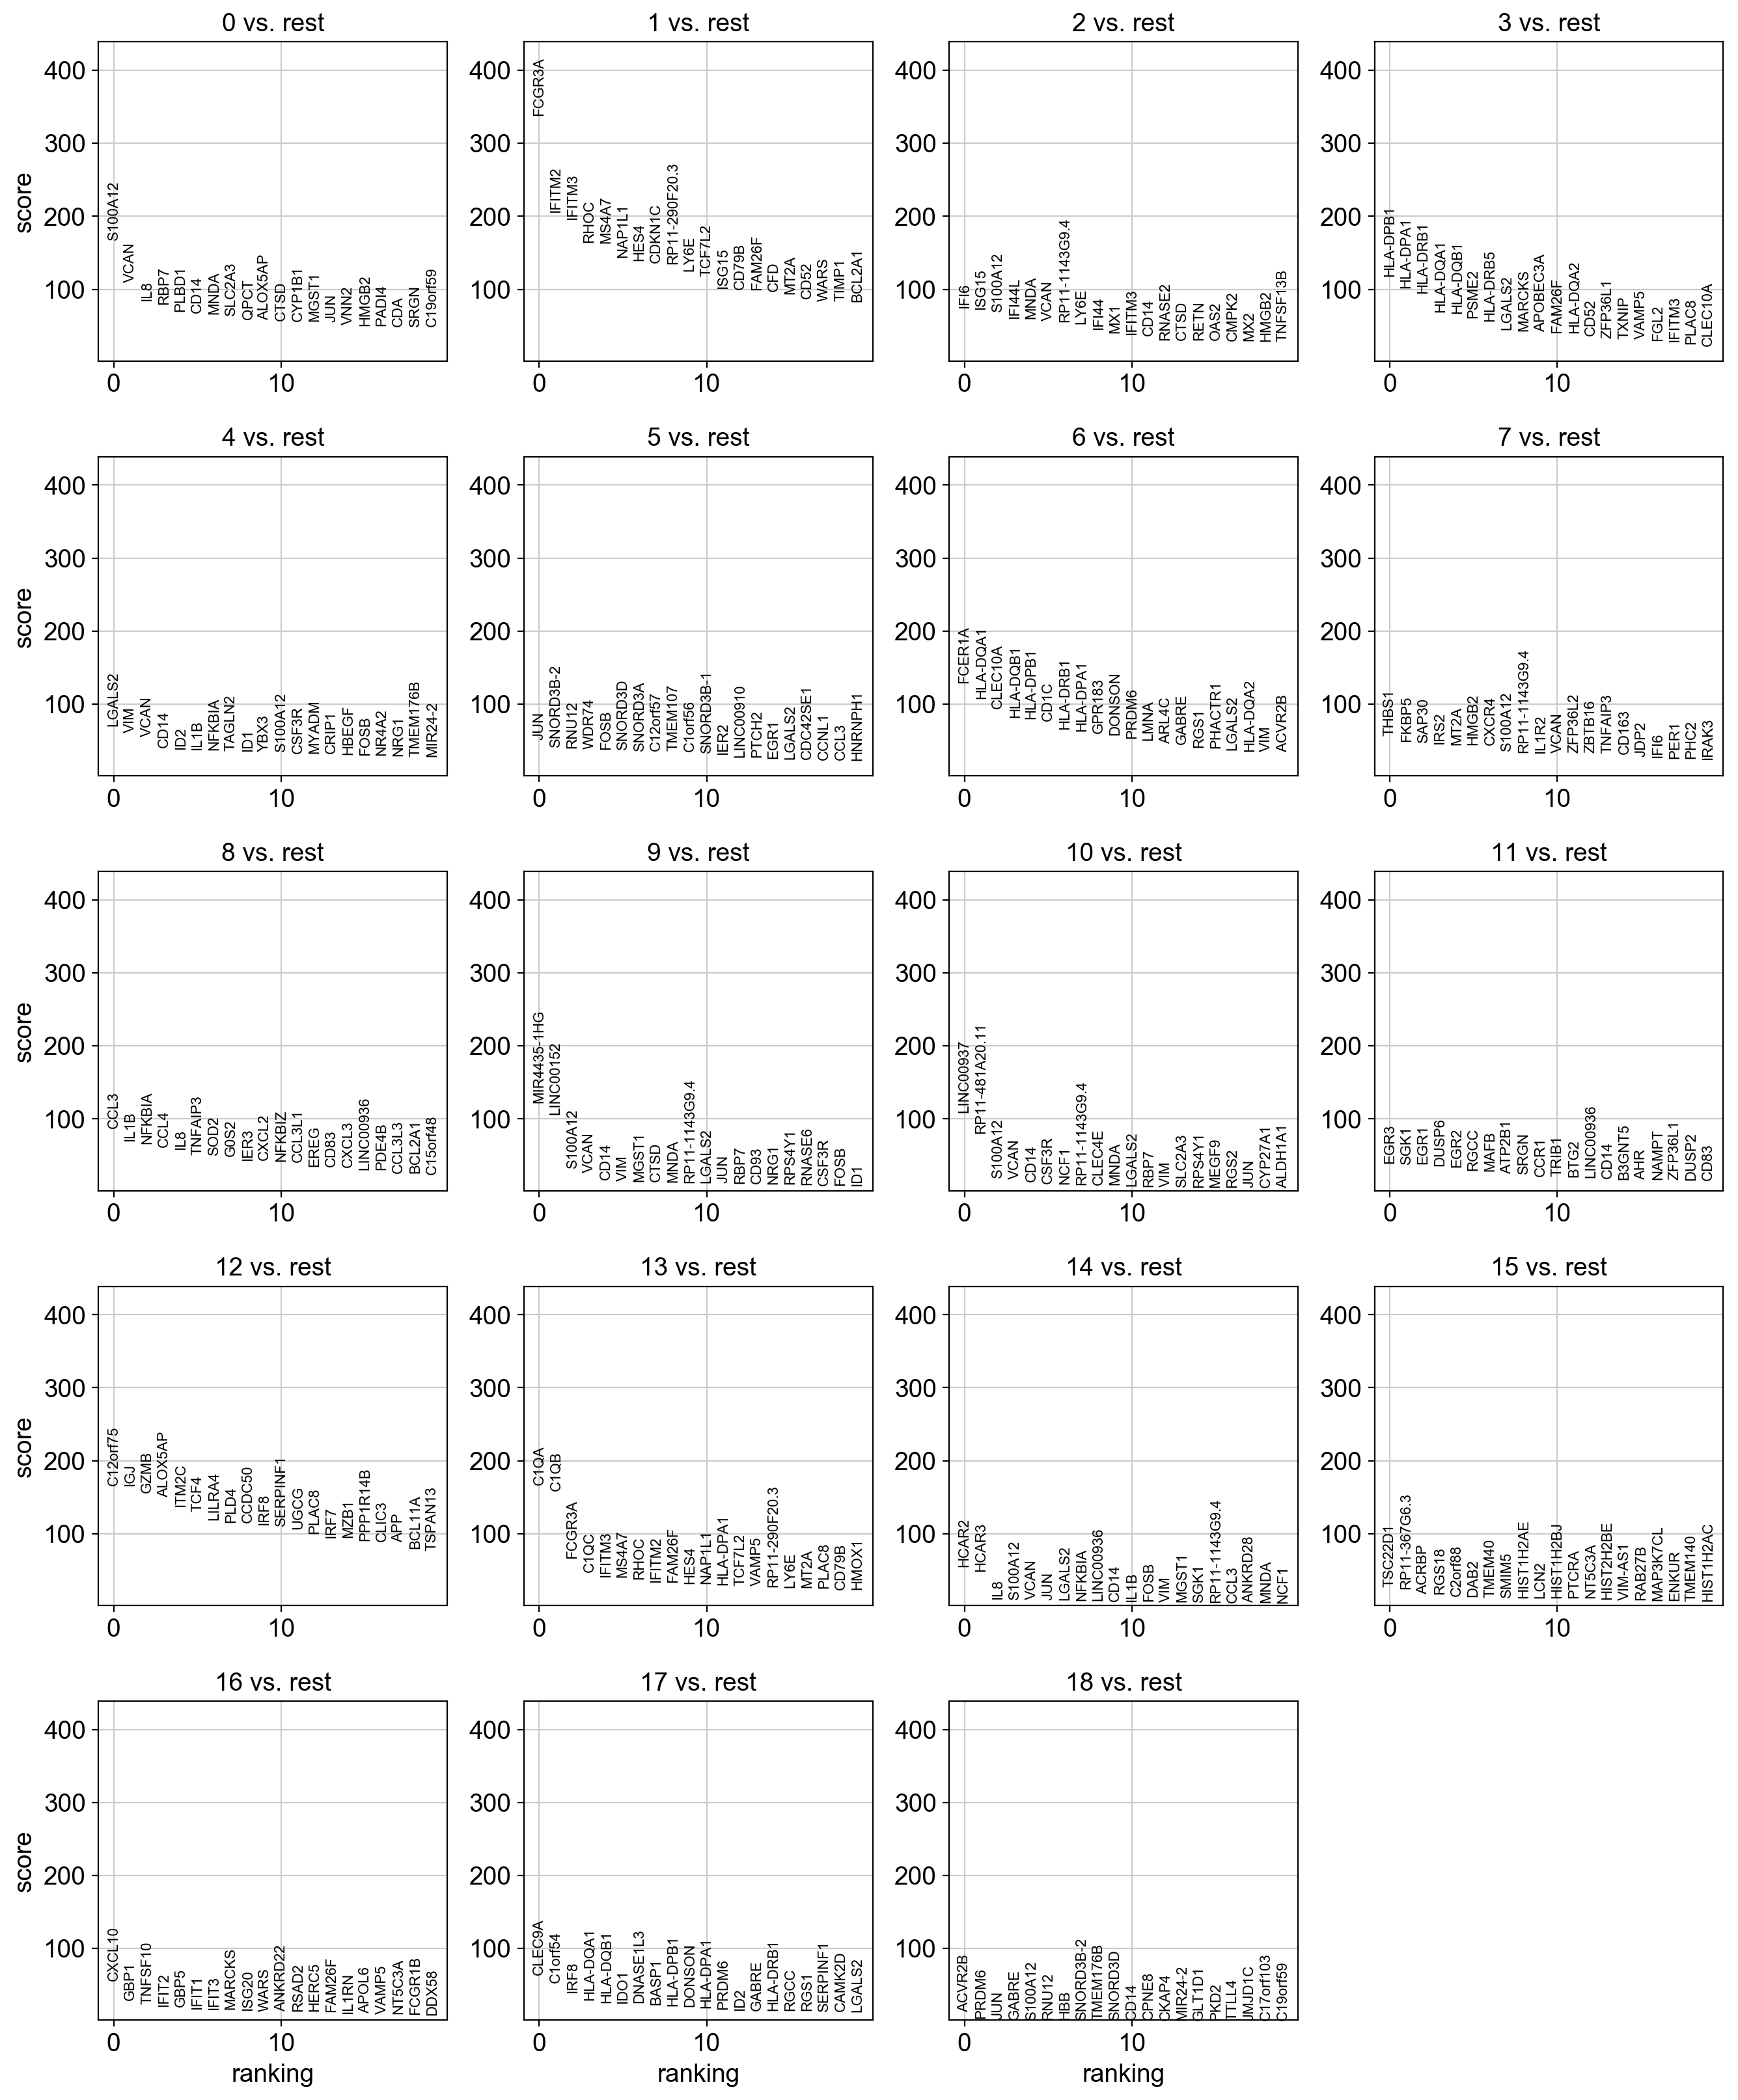

In [40]:
sc.tl.rank_genes_groups(adata, n_genes=20, groupby='leiden', use_raw=False)
sc.pl.rank_genes_groups(adata)